In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows',10000)
pd.set_option('display.min_rows',2000)
pd.set_option('display.column_space',30)
pd.set_option('display.max_colwidth',150)
pd.set_option('display.expand_frame_repr',True)

_end_dates    = pd.Series(pd.date_range(start="2020-10-08", end="2021-03-31", freq="D", tz='America/New_York'))
_start_dates  = _end_dates - pd.Timedelta(days=7)
_center_dates = _end_dates - pd.Timedelta(days=3.5)
end_dates     = _end_dates.apply(lambda x: x.timestamp())
center_dates  = _center_dates.apply(lambda x: x.timestamp())
start_dates   = _start_dates.apply(lambda x: x.timestamp())
_end_dates    = _end_dates.apply(lambda x:str(x).split(' ')[0])
_center_dates = _center_dates.apply(lambda x:str(x).split(' ')[0])
_start_dates  = _start_dates.apply(lambda x:str(x).split(' ')[0])

id_l = '/home/casonk/path/mmani_root/mmani0/shared_data/hot/push_file/IDL/'

j=1
k=21
r=1

In [2]:
def plotter(r,n):
    conspiracy_tl = []
    conspiracy_ei = []
    conspiracy_dt = []
    for date in _center_dates:
        ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
        top_50 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(50)
        comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
        top_ns_50 = comm_sub_pairs.loc[top_50.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
        coms = top_ns_50.index.get_level_values(0)
        subs = top_ns_50.index.get_level_values(1)
        dekka = pd.DataFrame({'com':coms, 'sub':subs})
        insubs = ['conspiracy']
        match = dekka[dekka['sub'].isin(insubs)]
        if len(match['com'].unique()) == 1:
            incom = int(match['com'].unique()[0])
            conspiracy_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
            conspiracy_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
            conspiracy_dt += [date]
    conservative_tl = []
    conservative_ei = []
    conservative_dt = []
    
    for date in _center_dates:
        ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
        top_50 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(50)
        comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
        top_ns_50 = comm_sub_pairs.loc[top_50.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
        coms = top_ns_50.index.get_level_values(0)
        subs = top_ns_50.index.get_level_values(1)
        dekka = pd.DataFrame({'com':coms, 'sub':subs})
        insubs = ['conservative']
        match = dekka[dekka['sub'].isin(insubs)]
        if len(match['com'].unique()) == 1:
            incom = int(match['com'].unique()[0])
            conservative_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
            conservative_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
            conservative_dt += [date]

    fig = plt.figure(figsize=(35,10))
    plt.scatter(y=conspiracy_ei, x=conspiracy_dt, s=[s/1000 for s in conspiracy_tl], alpha=0.25, c='black', label='conspiracy')
    plt.scatter(y=conservative_ei, x=conservative_dt, s=[s/1000 for s in conservative_tl], alpha=0.25, c='r', label='conservative')
    plt.xticks(rotation=90)
    plt.plot(['2021-01-06','2021-01-06'], [-1,0], alpha=0.25, c='black', ls='--')
    plt.ylabel('EI - Index')
    plt.xlabel('Date')
    plt.legend()

In [ ]:
conspiracy_tl = []
conspiracy_ei = []
conspiracy_dt = []
n=5
# n=10
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_50 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(50)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_50 = comm_sub_pairs.loc[top_50.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_50.index.get_level_values(0)
    subs = top_ns_50.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['conspiracy']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        conspiracy_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        conspiracy_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        conspiracy_dt += [date]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

In [ ]:
conservative_tl = []
conservative_ei = []
conservative_dt = []
n=5
# n=10
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_50 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(50)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_50 = comm_sub_pairs.loc[top_50.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_50.index.get_level_values(0)
    subs = top_ns_50.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    insubs = ['conservative']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        conservative_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        conservative_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        conservative_dt += [date]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

In [ ]:
nonewnormal_tl = []
nonewnormal_ei = []
nonewnormal_dt = []
n=5
# n=10
for date in _center_dates:
    ei_df = pd.read_pickle((id_l + date + ('/EI_DF_{}_{}_{}.pkl').format(j, k, r)))
    top_50 = ei_df.sort_values(by=['Total_Links'], ascending=False).head(50)
    comm_sub_pairs = pd.read_pickle((id_l + date + ('/CSP_{}_{}_{}.pkl').format(j, k, r)))
    top_ns_50 = comm_sub_pairs.loc[top_50.index].groupby(level=0, axis=0).apply(lambda x : x.head(n)).droplevel(0)
    coms = top_ns_50.index.get_level_values(0)
    subs = top_ns_50.index.get_level_values(1)
    dekka = pd.DataFrame({'com':coms, 'sub':subs})
    # insubs = ['nonewnormal']
    # insubs = ['guns']
    insubs = ['asktrumpsupporters']
    match = dekka[dekka['sub'].isin(insubs)]
    if len(match['com'].unique()) == 1:
        incom = int(match['com'].unique()[0])
        nonewnormal_tl += [ei_df.loc[incom, ['Total_Links','EI_Index']][0]]
        nonewnormal_ei += [ei_df.loc[incom, ['Total_Links','EI_Index']][1]]
        nonewnormal_dt += [date]
        print(date, incom)
    else:
        print('**', date, len(match['com'].unique()), 'comm')

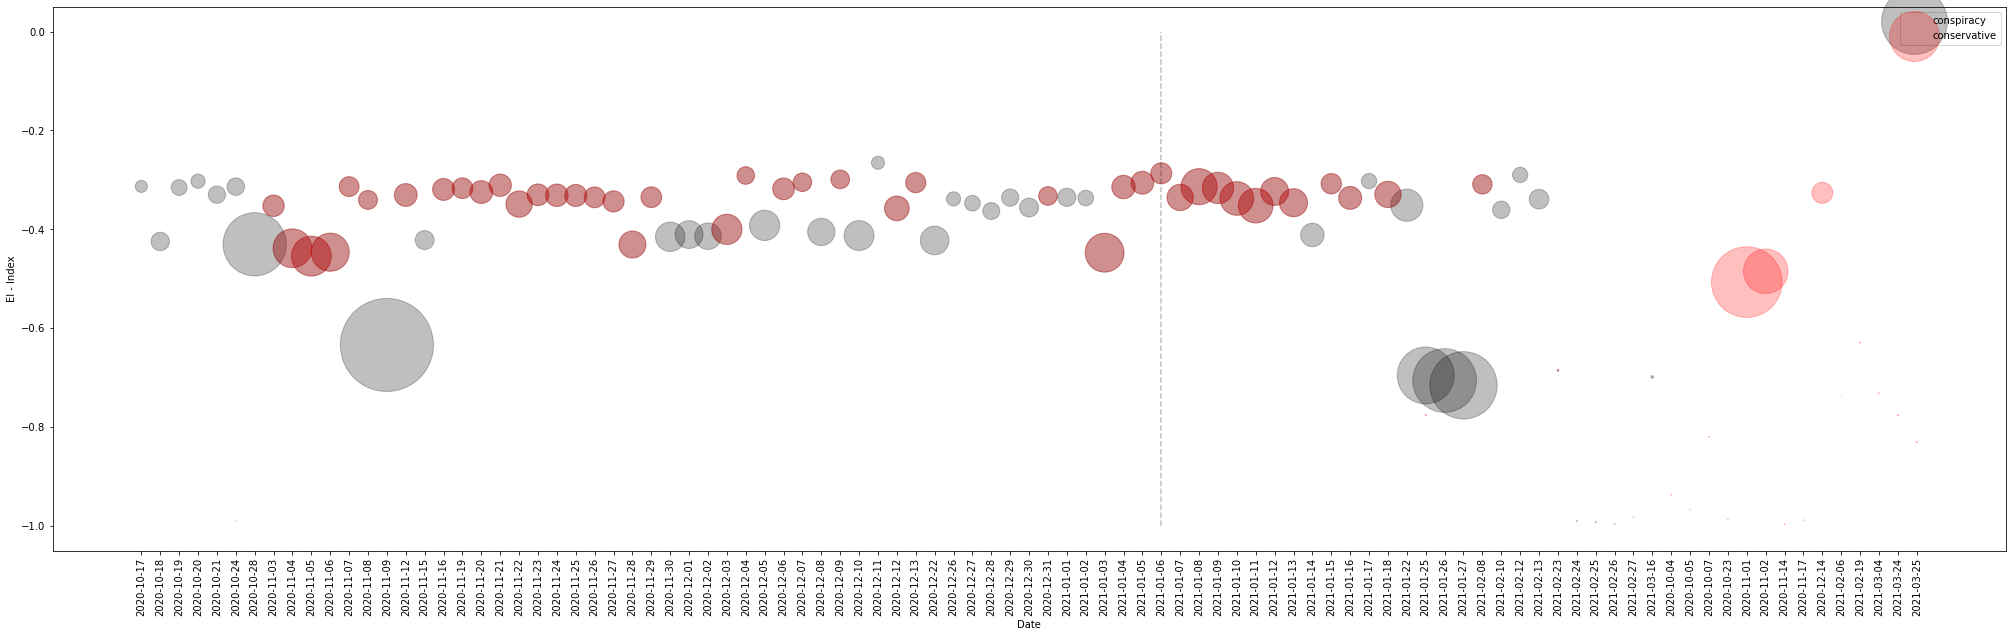

In [7]:
plotter(0.5,5)

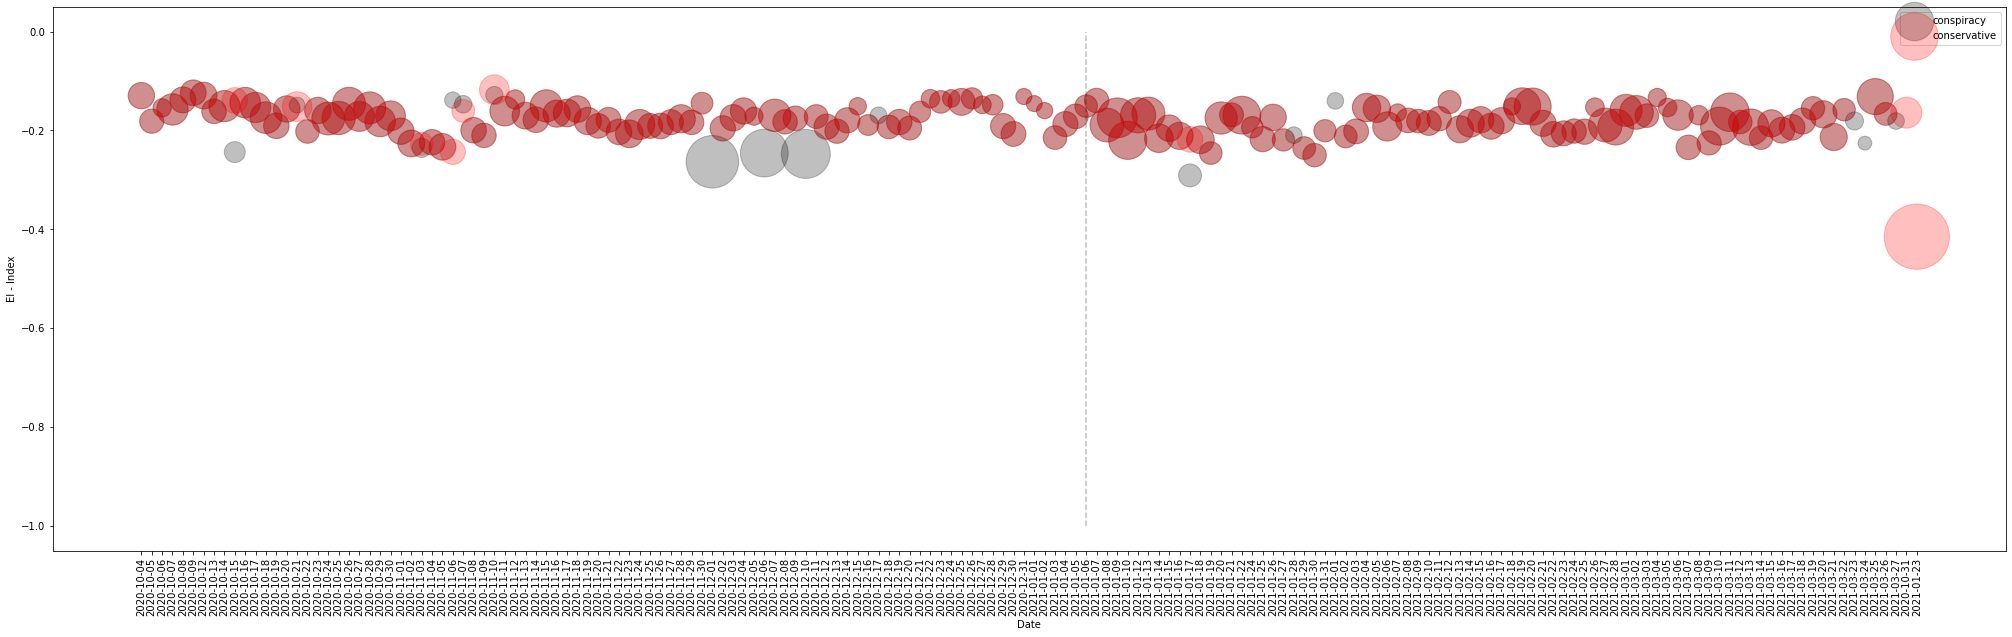

In [8]:
plotter(1,5)

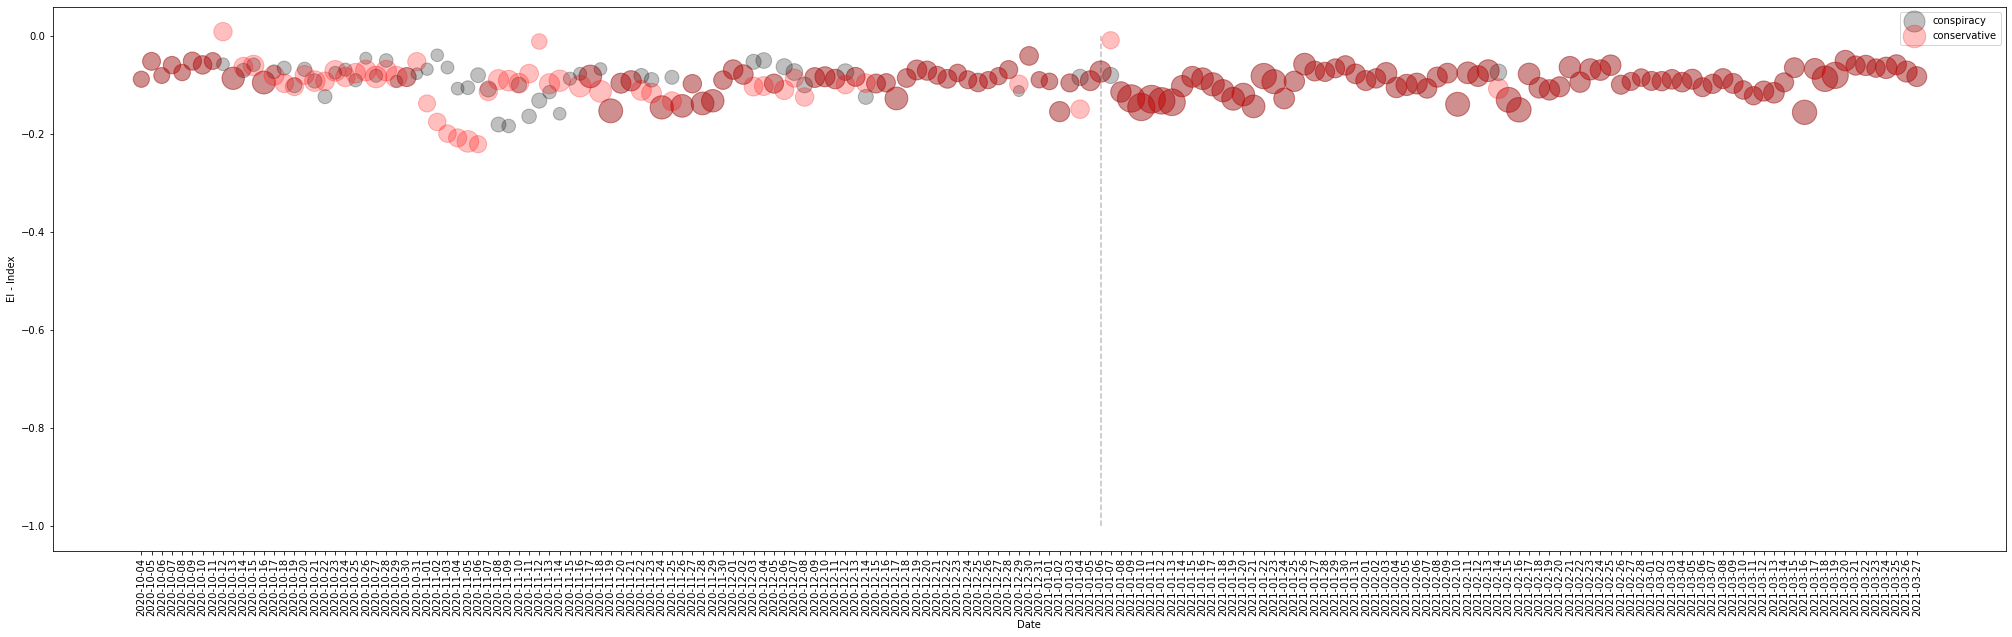

In [9]:
plotter(2,5)

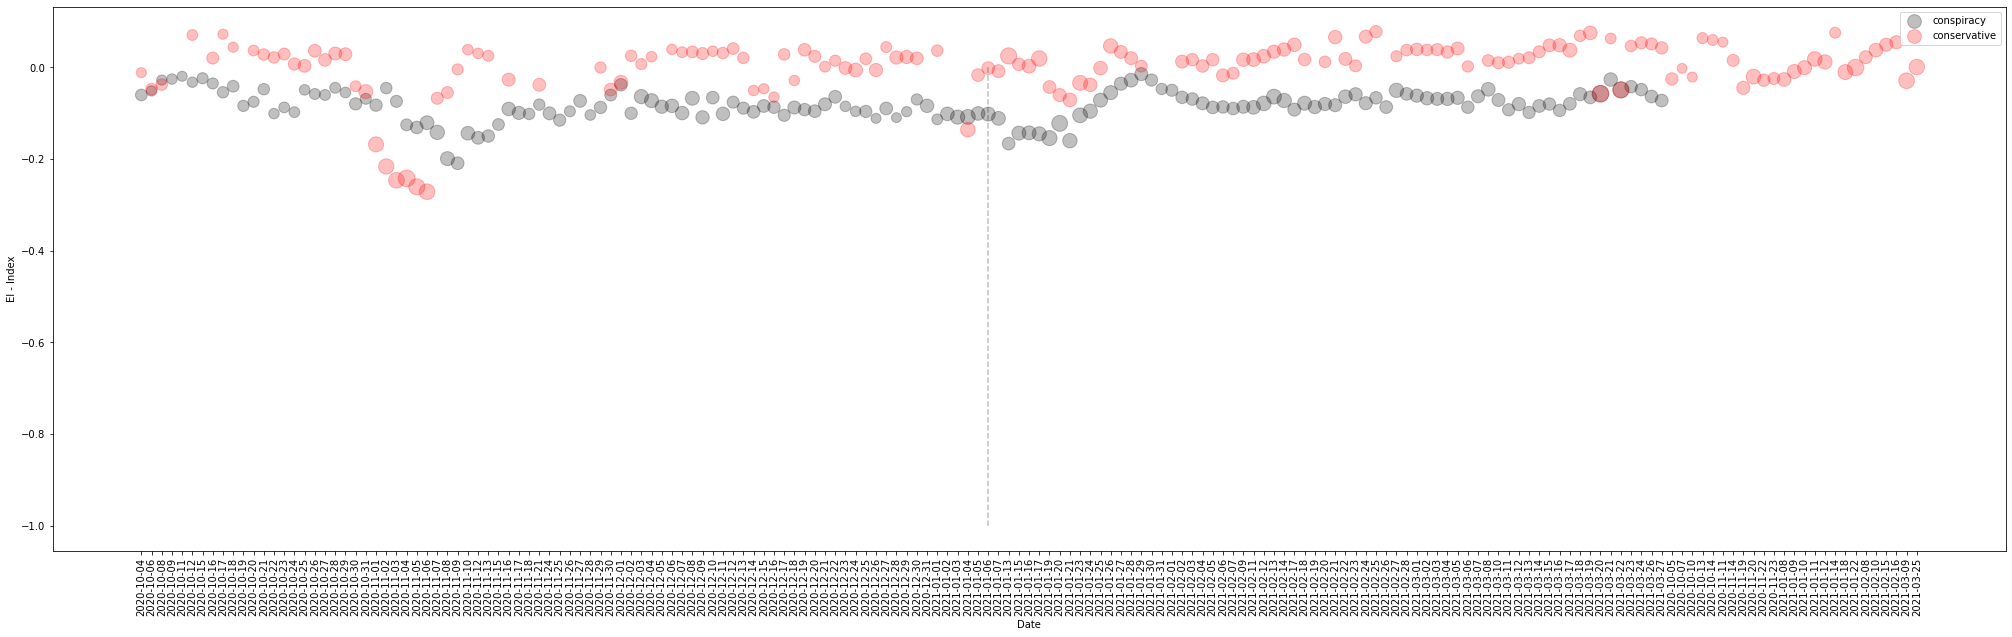

In [10]:
plotter(5,5)